In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

In [2]:
h=6.626e-34
hbar=h/2/np.pi
Qe=1.608e-19
Phi0=h/2/Qe

In [3]:
def Asymmetric_Fraun(Jc, B, x_array,A,C):
    def Ic_phase(phase1,phase2):
        IC=0
        for i in range(0,len(x_array)):
            IC += Jc[i]*(np.sin(2*np.pi*L*B*x_array[i]/Phi0+phase1)+A*np.sin(4*np.pi*L*B*x_array[i]/Phi0+phase2+C))
        return IC
    return Ic_phase(np.pi/2,np.pi/2-C)

In [4]:
def Standard_Fraun(Jc, B, x_array):
    IC = 0
    for i in range(0,len(Jc)):
        IC += Jc[i]*np.sin(2*np.pi*L*B*x_array[i]/Phi0+np.pi/2)
    return IC

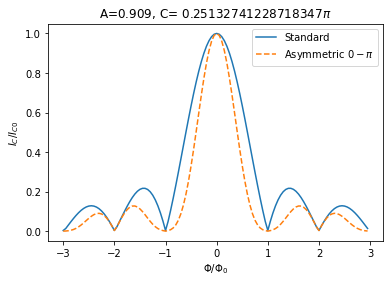

In [5]:
L=(100+16*2)*1e-9
W=4e-7
Bc=0.05

width = np.linspace(-W/2, W/2, 300)
uniform_Jc=np.ones(len(width))

Flux_norm = np.arange(-3,3,0.05) #Phi/Phi0
Ic_Asymmetric = np.empty(len(Flux_norm))
Ic_Standard = np.empty(len(Flux_norm))

A=0.909
C=0.08*np.pi
for j in range(0,len(Flux_norm)):
#    IC[j]=abs(I_of_B(Jc, B_fields[j], width))
    Ic_Asymmetric[j]=abs(Asymmetric_Fraun(uniform_Jc, Flux_norm[j]*(Phi0/L/W), width,A,C))
    Ic_Standard[j]=abs(Standard_Fraun(uniform_Jc, Flux_norm[j]*(Phi0/L/W), width))
plt.figure()
plt.plot(Flux_norm, Ic_Standard/max(Ic_Standard)
                 , label = "Standard")
        #plt.plot(B_fields,np.abs(np.sin(np.pi*Flux_norm)/(np.pi*Flux_norm)),'r-',label ='Standard,Analytical')
#plt.plot(Flux_norm,np.abs((np.sin(np.pi*Flux_norm))**2/(np.pi*Flux_norm)),label ='$0-\pi$,Analytical')
plt.plot(Flux_norm, Ic_Asymmetric/max(Ic_Asymmetric)
                 ,'--', label = "Asymmetric $0-\pi$")

plt.title('A='+str(A)+', C= '+str(C)+'$\pi$')
plt.legend()
plt.xlabel('$\Phi/\Phi_0$')
plt.ylabel('$I_C/I_{C0}$')
        #plt.show()
plt.savefig('A='+str(A)+'_C='+str(C)+'pi.pdf',format='pdf')
plt.show()

#print ("done")